<a href="https://colab.research.google.com/github/collinsbett1/Autolib-Dataset-Hypothesis-Testing/blob/main/Autolib_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTOLIB HYPOTHESIS ANALYSIS


## 1. Defining the question.

### a) Specifying the Data Analytic Question.
As a data scientist for Autlib I would like to know whether the mean of Bluecars taken over the weekday is the same as the mean of the Bluecars taken on the weeekends.

Therefore;

  H0(null hypothesis): μ1(mean of BlueCars taken on the weekday) = μ2(mean of BlueCars taken on the weekend)

  H1(alternate hypothesis): μ1 ≠ μ2

### b) Defining the Metric for Success.
The analysis will be considered a success if we will be able to reject or fail to reject our hypothesis.

### c) Understanding the context. 
Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 


## 2. Reading the Data.


In [169]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [170]:
# Loading the dataset
url = "http://bit.ly/DSCoreAutolibDataset"
df = pd.read_csv(url)

## 3. Checking the Data.

In [171]:
# Determining the number of records in our dataset.
df.shape

(16085, 13)

In [172]:
# Previewing the top of our dataset.
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [173]:
# Previewing the bottom of our dataset
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [174]:
# Checking whether each column has an appropriate datatype
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [175]:
# Description of the numerical data
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## 5. Tidying the dataset.

In [176]:
# drop the unnecessary 'n_daily_data_points' column
df.drop(['n_daily_data_points'], axis = 1, inplace=True)

In [177]:
# Changing column names to lower case
df.columns= df.columns.str.lower()

In [178]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

In [179]:
# Identifying the Missing Data
df.isnull().sum()

postal_code               0
date                      0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [180]:
# Checking for duplicates
df.duplicated().any()

False

In [182]:
# Checking for null values
df.isnull().sum()

postal_code               0
date                      0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [183]:
# Saving the cleaned dataset 
df.to_csv("newautolib.csv")

## 6. Exploratory Analysis


### 6.1 Univariate Analysis.

#### 6.1.1 Numerical Variables

##### a) Measures of Central Tendancy

Mean

In [184]:
# Mean of bluecars_taken_sum
df["bluecars_taken_sum"].mean()

125.92695057506994

In [185]:
# Mean of bluecars_returned_sum
df["bluecars_returned_sum"].mean()

125.912713708424

Median

In [186]:
# Median of bluecars_taken_sum
df["bluecars_taken_sum"].median()

46.0

In [187]:
# Median of bluecars_taken_sum
df["bluecars_returned_sum"].median()

46.0

Mode

In [188]:
# Mode of bluecars_taken_sum
df["bluecars_taken_sum"].mode()

0    12
dtype: int64

In [189]:
# Mode of bluecars_returned_sum
df["bluecars_returned_sum"].mode()

0    13
dtype: int64

#### b) Measures of dispersion

Standard Deviation

In [190]:
# SD of bluecars_taken_sum
df["bluecars_taken_sum"].std()

185.42657876727893

In [191]:
# SD of bluecars_returned_sum
df["bluecars_returned_sum"].std()

185.50153480148427

Variance

In [192]:
# Variance of bluecars_taken_sum
df["bluecars_taken_sum"].var()

34383.01611333789

In [193]:
# Variance of bluecars_taken_sum
df["bluecars_returned_sum"].var()

34410.819413706275

Range

In [194]:
# Range of bluecars_taken_sum
ra_max = df["bluecars_taken_sum"].max()
ra_min = df["bluecars_taken_sum"].min()
ra_max - ra_min

1352

In [195]:
# Range of bluecars_taken_sum
ra_max = df["bluecars_returned_sum"].max()
ra_min = df["bluecars_returned_sum"].min()
ra_max - ra_min

1332

Quantiles

In [196]:
# Quantile of bluecars_taken_sum
df["bluecars_taken_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [197]:
# Quantile of bluecars_returned_sum
df["bluecars_returned_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

Skewness

In [198]:
# Skewness of bluecars_taken_sum
df["bluecars_taken_sum"].skew()

2.4063548974959086

In [199]:
# Skewness of bluecars_taken_sum
df["bluecars_returned_sum"].skew()

2.412084978838923

Kurtosis

In [200]:
# Kurtosis of bluecars_taken_sum
df['bluecars_taken_sum'].kurt()

6.172692305510042

In [201]:
# Kurtosis of respondent age
df['bluecars_returned_sum'].kurt()

6.1862880957582345

##### 6.1.2 Categorical Variables

##### a) Bar Chart

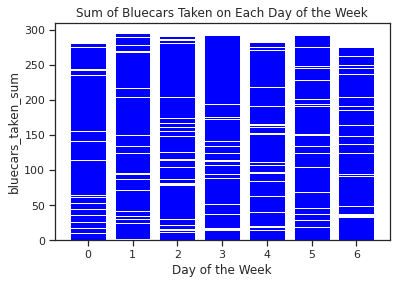

In [202]:
## Bar chart of type of dayofweek against bluecars_taken_sum
# defining the x and y axis values
day = df1['dayofweek']
bluecars_taken_sum = df1['bluecars_taken_sum']
# plottin the bar
plt.bar(day, bluecars_taken_sum, color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('bluecars_taken_sum')
plt.title('Sum of Bluecars Taken on Each Day of the Week')
plt.show()

The bar chart shows that the total number of bluecars taken are nearly similar across the days of the week.

##### b) Histogram

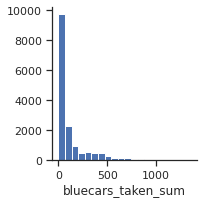

In [203]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)
bt_hist = sns.FacetGrid(df)
bt_hist.map(plt.hist, 'bluecars_taken_sum', bins=20)

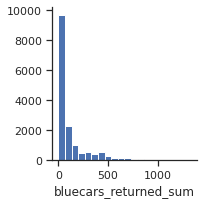

In [204]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)
bt_hist = sns.FacetGrid(df)
bt_hist.map(plt.hist, 'bluecars_returned_sum', bins=20)

The two histograms show that the number of bluecars taken and returned is not normally distributed and is skewed to the right.

In [205]:
# Description of the data
df.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


### 6.2 Bivariate Analysis

##### 6.2.1 Numerical and Numerical

###### a) Scatter Plot

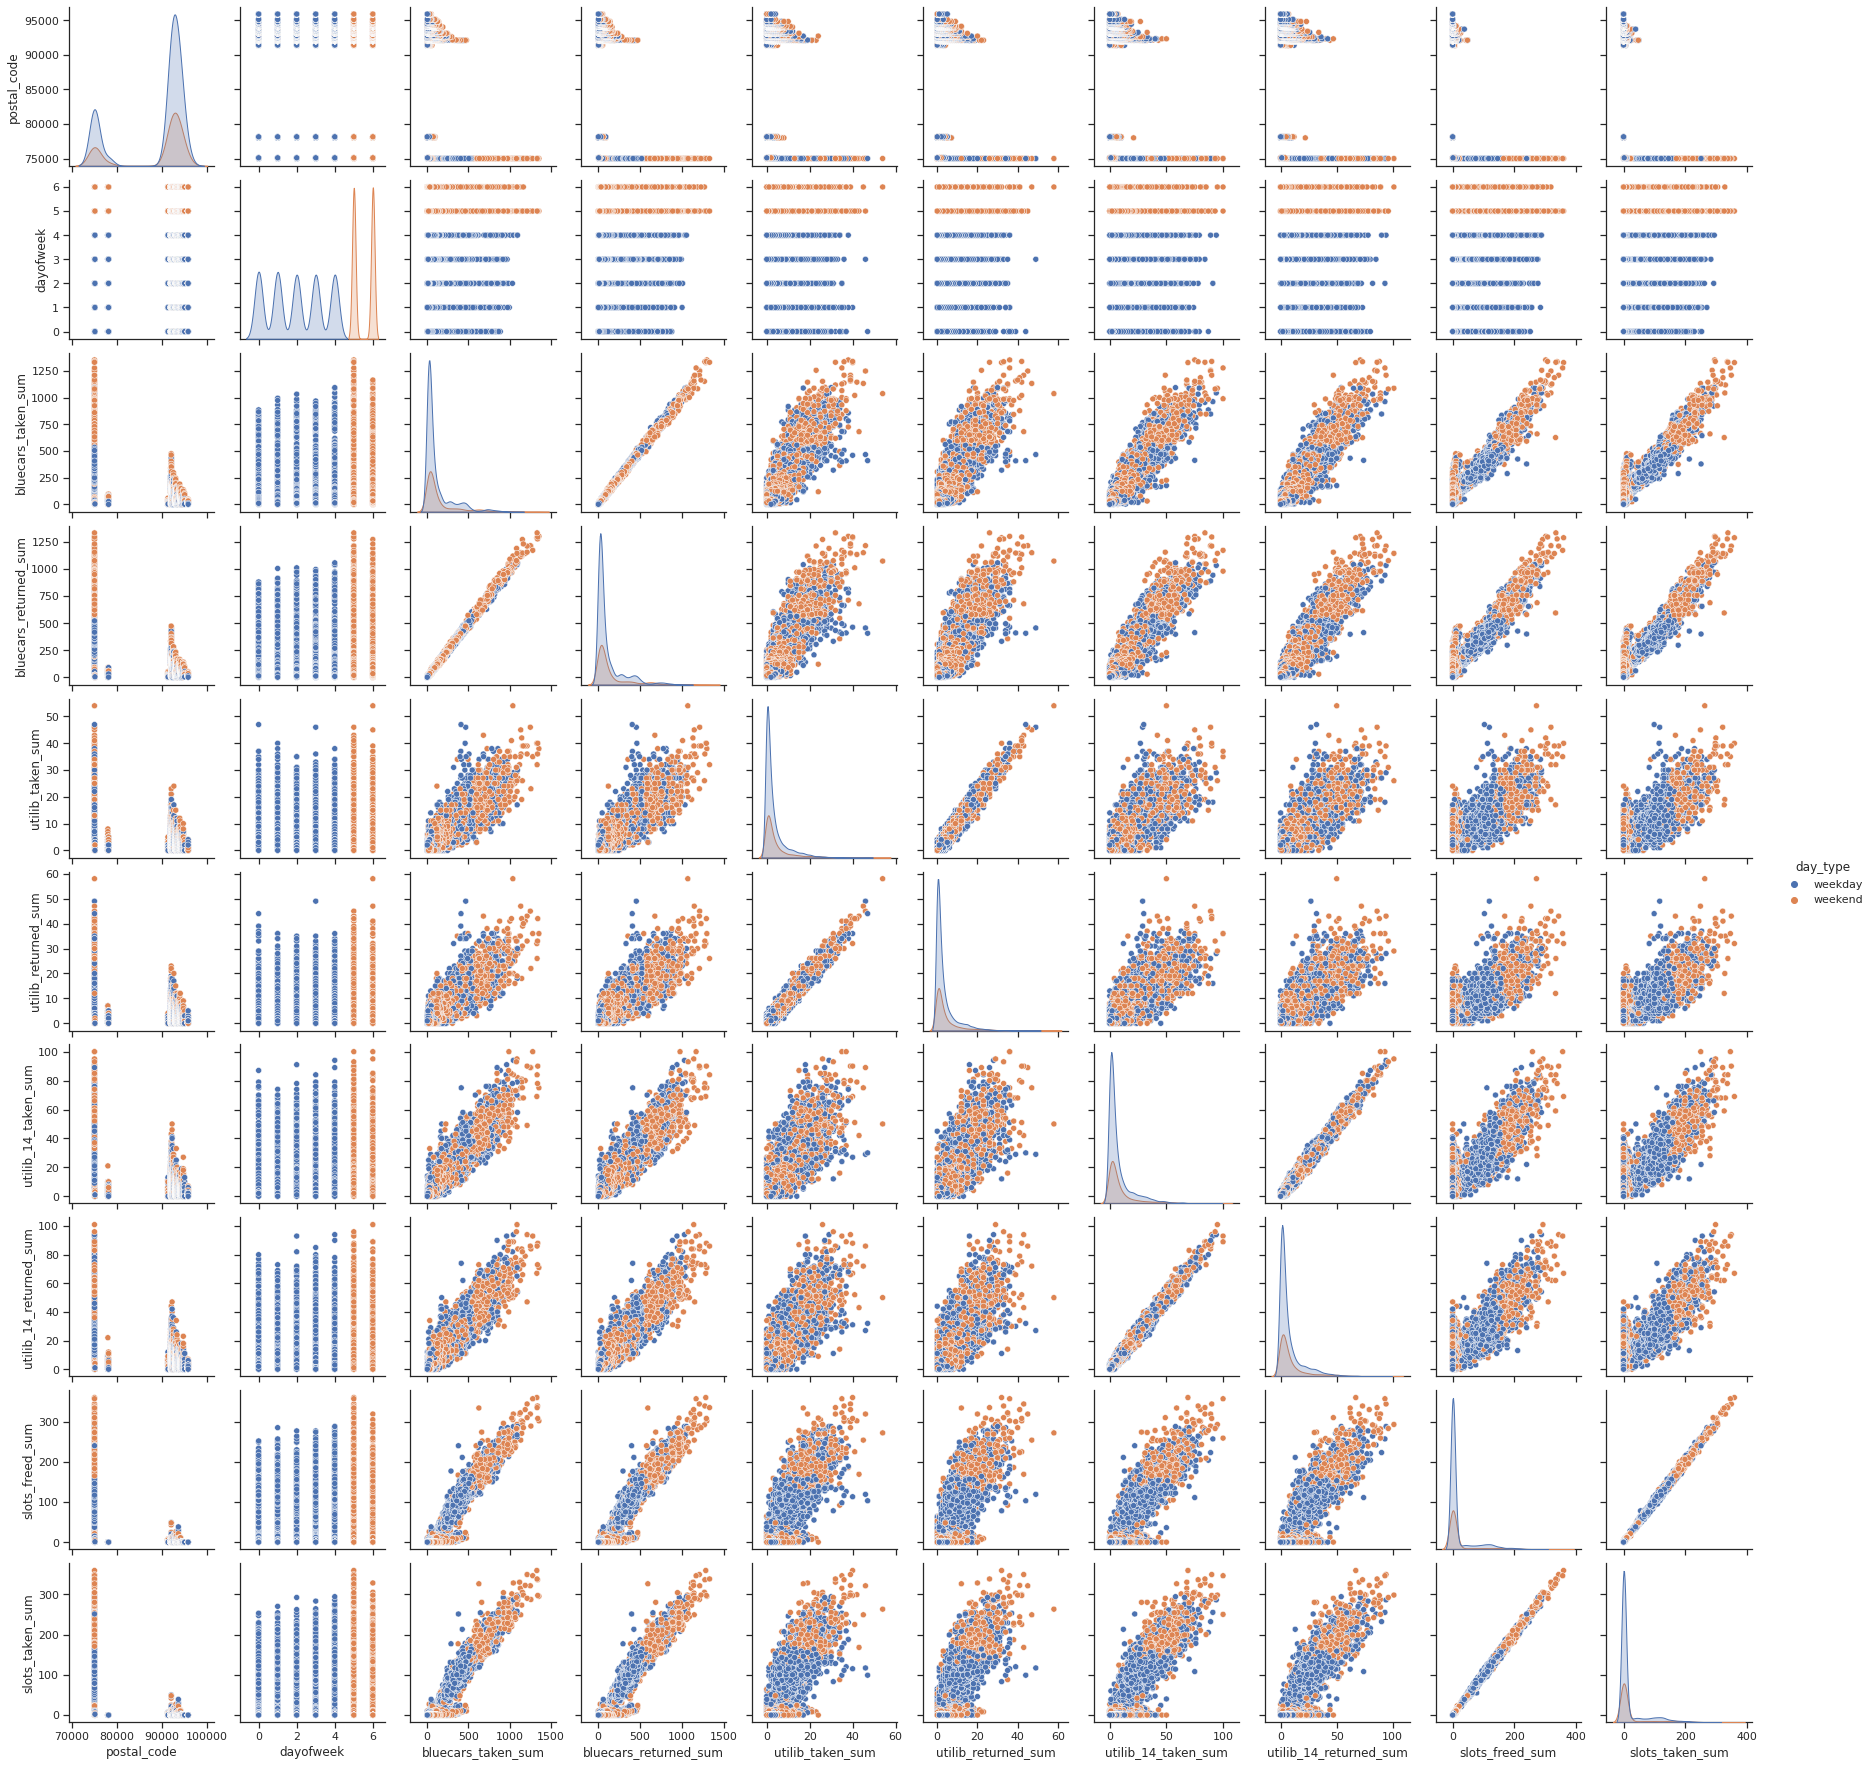

In [213]:
# Bivariate summaries 
sns.pairplot(df,hue = 'day_type')

###### b) Correlation

In [208]:
# Checking for correlation
df.corr(method='pearson')

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
dayofweek,0.000343,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
bluecars_taken_sum,-0.698020,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,-0.697519,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,-0.625521,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,-0.624786,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,-0.656744,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,-0.656516,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,-0.749528,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
slots_taken_sum,-0.749157,0.050468,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


## 7. Hypothesis Testing

H0(null hypothesis): μ1(mean of BlueCars taken on the weekday) = μ2(mean of BlueCars taken on the weekend)

H1(alternate hypothesis): μ1 ≠ μ2

The level of significance is 0.05

In [226]:
from scipy.stats import shapiro 

# testing for normality for Bluecars Taken 
stat, p = shapiro(df['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.661, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [228]:
# Getting the sums of bluecars on weekdays
weekday= df[(df['day_type']== 'weekday')]
group1 = weekday.bluecars_taken_sum
group1

0        110
1         98
2        138
3        104
4        114
        ... 
16078     12
16079     15
16080     15
16083     11
16084      2
Name: bluecars_taken_sum, Length: 11544, dtype: int64

In [229]:
# Getting the sums of bluecars on weekdays
weekend = df[(df['day_type'] == 'weekend')]
group2 = weekend.bluecars_taken_sum
group2

5        187
6        180
12       224
13       193
19       217
        ... 
16068     36
16074     15
16075     34
16081     19
16082     33
Name: bluecars_taken_sum, Length: 4541, dtype: int64

In [236]:
#find variance for each group
print(np.var(group1), np.var(group2))
print("Since", np.var(group1) / np.var(group2),"is less than four, we can assume that the variances of the two groups are equal" )

28770.79430954003 47760.4197670291
Since 0.6023982714113757 is less than four, we can assume that the variances of the two groups are equal


In [240]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(group1,group2)

print("This is the p-value", pval)
print("This is the value of the ttest", ttest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

This is the p-value 2.9687141189928577e-27
This is the value of the ttest -10.833428743425204
We reject the Null Hypothesis


## 8. Conclusion
We reject our Null Hypothesis that the mean of Bluecars taken on weekdays is equal to the mean of Bluecars taken during the weekends because our P-value(2.9687141189928577e-27) is less than our level of significance of 0.05.